In [67]:
#!/usr/bin/env python

import numpy as np
import MDAnalysis
import matplotlib.pyplot as plt
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import pandas as pd
import subprocess, os, StringIO, re, datetime, time, sys
import optparse

def obtain_asphericity_change(u, mol):
    MA0x5_buffer = u.select_atoms("resname " + str(mol))
    dim = u.dimensions[0:3]
    middle = dim/2.0
    Asphere = []
    for ts in u.trajectory:
        Asphere.append((u.trajectory.time, MA0x5_buffer.radius_of_gyration(pbc = True)))
    Asphere = np.array(Asphere)
    return Asphere

def obtain_end2end_dist(u, mol):
    MA0x5_buffer = u.select_atoms("resname " + str(mol))
    Output = []
    for ts in u.trajectory:
        N = u.select_atoms("resid 1 and name N")
        C = u.select_atoms("resid 5 and name C")
        
        Output.append((u.trajectory.time, np.linalg.norm(C.positions - N.positions)))
    Output = np.array(Output)
    return Output

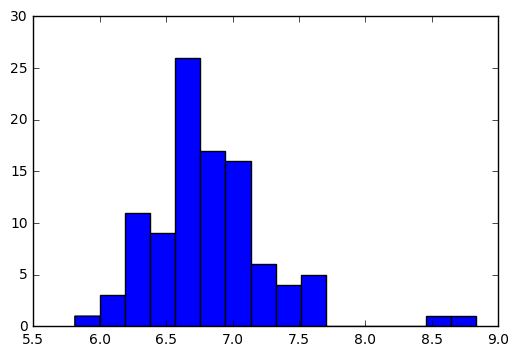

In [46]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/11.MA1x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/11.MA1x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
MA1 = obtain_asphericity_change(u, "MA1")

plt.hist(MA1[:, 1], bins = 'auto')
#set_xlabel("time (ps)")
#set_ylabel(r"Asphericity")
#plt.xlim([0,1])
plt.show()

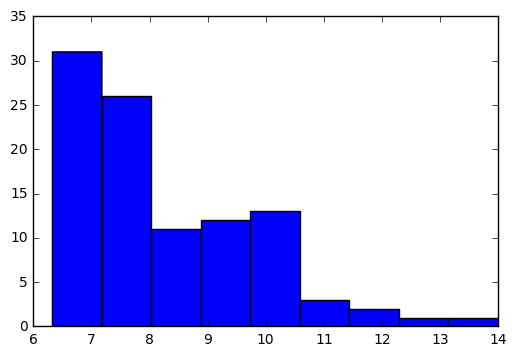

In [116]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/30week/6.MA0x5_RE_interface_pyemma/Input/polymer.gro", "/home/shuzhe//Simulations/30week/6.MA0x5_RE_interface_pyemma/Input/pcca2_100samples.xtc")
MA1 = obtain_asphericity_change(u, "MA0")

plt.hist(MA1[:, 1], bins = 'auto')
#set_xlabel("time (ps)")
#set_ylabel(r"Asphericity")
#plt.xlim([0,1])
plt.show()

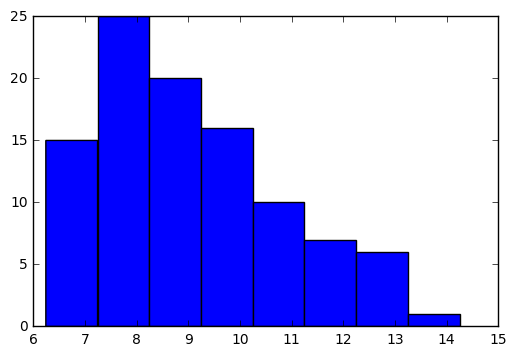

In [117]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/30week/7.MA1x5_RE_interface_pyemma/Input/polymer.gro", "/home/shuzhe//Simulations/30week/7.MA1x5_RE_interface_pyemma/Input/pcca2_100samples.xtc")
MA1 = obtain_asphericity_change(u, "MA1")

plt.hist(MA1[:, 1], bins = 'auto')
#set_xlabel("time (ps)")
#set_ylabel(r"Asphericity")
#plt.xlim([0,1])
plt.show()

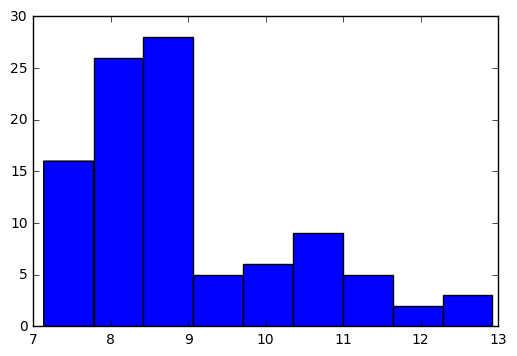

In [118]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/30week/8.MB0x5_RE_interface_pyemma/Input/polymer.gro", "/home/shuzhe//Simulations/30week/8.MB0x5_RE_interface_pyemma/Input/pcca2_100samples.xtc")
MA1 = obtain_asphericity_change(u, "MB0")

plt.hist(MA1[:, 1], bins = 'auto')
#set_xlabel("time (ps)")
#set_ylabel(r"Asphericity")
#plt.xlim([0,1])
plt.show()

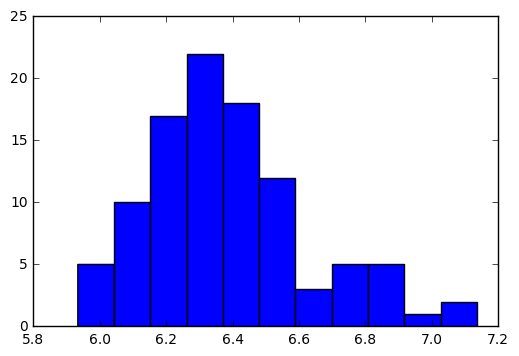

In [114]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/10.MA0x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/10.MA0x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
MA1 = obtain_asphericity_change(u, "MA0")
plt.hist(MA1[:, 1], bins = 'auto')
#set_xlabel("time (ps)")
#set_ylabel(r"Asphericity")
#plt.xlim([0,1])
plt.show()



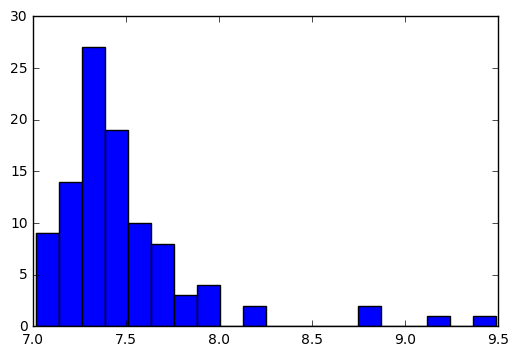

In [36]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/13.MB1x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/13.MB1x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
MA1 = obtain_asphericity_change(u, "MB1")
plt.hist(MA1[:, 1], bins = 'auto')
#set_xlabel("time (ps)")
#set_ylabel(r"Asphericity")
#plt.xlim([0,1])
plt.show()

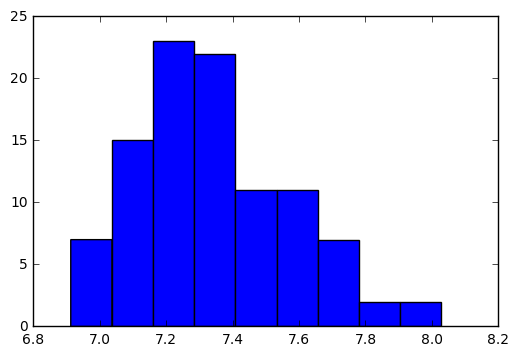

In [39]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/12.MB0x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/12.MB0x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
MA1 = obtain_asphericity_change(u, "MB0")
plt.hist(MA1[:, 1], bins = 'auto')
#set_xlabel("time (ps)")
#set_ylabel(r"Asphericity")
#plt.xlim([0,1])
plt.show()

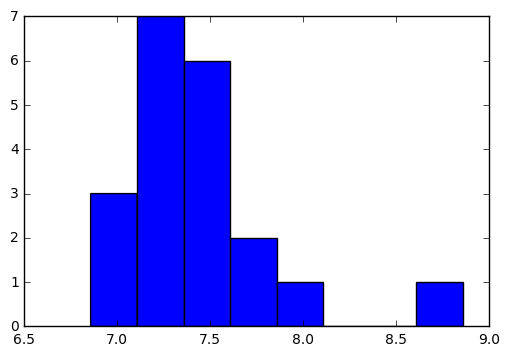

In [47]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/12.MB0x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/12.MB0x5_solv_buffer_multi_trj/Output/pcca1_20samples.xtc")
MA1 = obtain_asphericity_change(u, "MB0")
plt.hist(MA1[:, 1], bins = 'auto')
#set_xlabel("time (ps)")
#set_ylabel(r"Asphericity")
#plt.xlim([0,1])
plt.show()

In [51]:
import pandas as pd
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/12.MB0x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/12.MB0x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
MB0 = obtain_asphericity_change(u, "MB0")
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/11.MA1x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/11.MA1x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
MA1 = obtain_asphericity_change(u, "MA1")
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/10.MA0x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/10.MA0x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
MA0 = obtain_asphericity_change(u, "MA0")
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/13.MB1x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/13.MB1x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
MB1 = obtain_asphericity_change(u, "MB1")
df = pd.DataFrame({
        "A0" :MA0[:,1], 
        "A1" : MA1[:,1],
        "B0" :MB0[:,1],
        "B1" : MB1[:,1]})

df.to_csv("/home/shuzhe/Simulations/Figures/gyration.csv")

In [69]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/12.MB0x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/12.MB0x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
MB0 = obtain_end2end_dist(u, "MB0")
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/11.MA1x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/11.MA1x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
MA1 = obtain_end2end_dist(u, "MA1")
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/10.MA0x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/10.MA0x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
MA0 = obtain_end2end_dist(u, "MA0")
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/13.MB1x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/13.MB1x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
MB1 = obtain_end2end_dist(u, "MB1")
df = pd.DataFrame({
        "A0" :MA0[:,1], 
        "A1" : MA1[:,1],
        "B0" :MB0[:,1],
        "B1" : MB1[:,1]})

df.to_csv("/home/shuzhe/Simulations/Figures/end2end.csv")

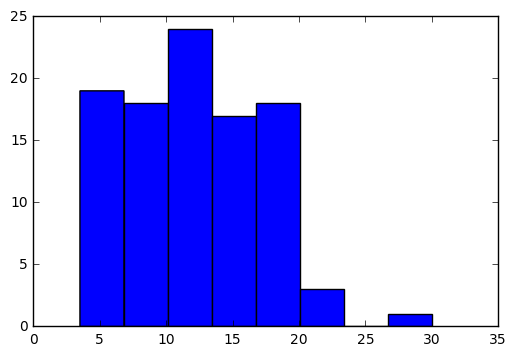

In [70]:
plt.hist(MA1[:, 1], bins = 'auto')
#set_xlabel("time (ps)")
#set_ylabel(r"Asphericity")
#plt.xlim([0,1])
plt.show()

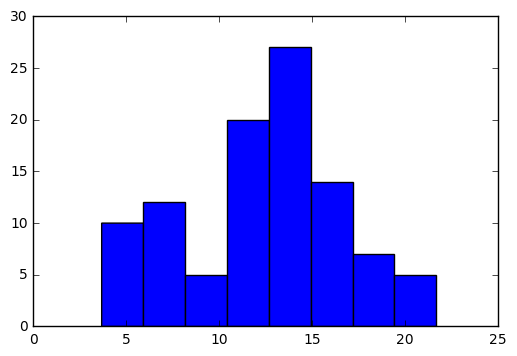

In [72]:
plt.hist(MA0[:, 1], bins = 'auto')
#set_xlabel("time (ps)")
#set_ylabel(r"Asphericity")
#plt.xlim([0,1])
plt.show()

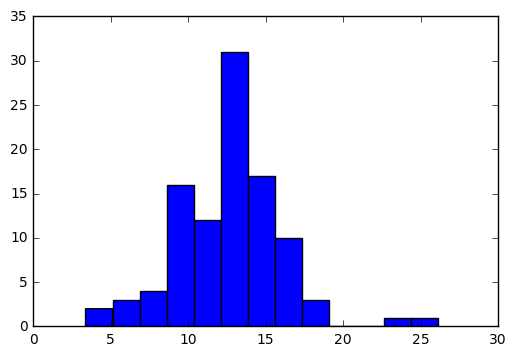

In [73]:
plt.hist(MB0[:, 1], bins = 'auto')
#set_xlabel("time (ps)")
#set_ylabel(r"Asphericity")
#plt.xlim([0,1])
plt.show()

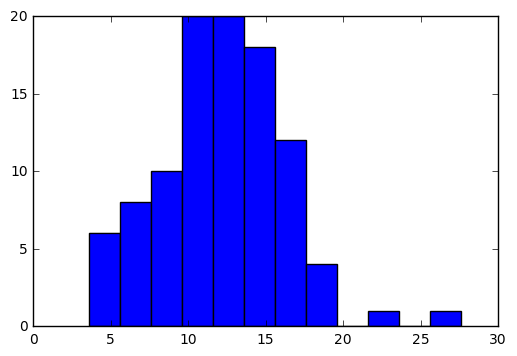

In [75]:
plt.hist(MB1[:, 1], bins = 'auto')
#set_xlabel("time (ps)")
#set_ylabel(r"Asphericity")
#plt.xlim([0,1])
plt.show()

In [98]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def obtain_direction_dist(u, mol, carbon, oxygen):
    MA0x5_buffer = u.select_atoms("resname " + str(mol))
    x,y,z = [], [] ,[]
    for ts in u.trajectory:
        for i in range(5):
            C = u.select_atoms("resid " + str(i + 1) + " and name " + carbon)
            O = u.select_atoms("resid " + str(i + 1) + " and name " + oxygen)
        
            tmp = (C.positions - O.positions)[0]
        
            x.append(tmp[0])
            y.append(tmp[1])
            z.append(tmp[2])

    #Output = np.array(Output)
    return x,y,z



In [120]:
import pandas as pd
u = MDAnalysis.Universe("/home/shuzhe//Simulations/30week/6.MA0x5_RE_interface_pyemma/Input/polymer.gro", "/home/shuzhe//Simulations/30week/6.MA0x5_RE_interface_pyemma/Input/pcca1_100samples.xtc")
MA0 = obtain_end2end_dist(u, "MA0")
u = MDAnalysis.Universe("/home/shuzhe//Simulations/30week/7.MA1x5_RE_interface_pyemma/Input/polymer.gro", "/home/shuzhe//Simulations/30week/7.MA1x5_RE_interface_pyemma/Input/pcca1_100samples.xtc")
MA1 = obtain_end2end_dist(u, "MA1")

u = MDAnalysis.Universe("/home/shuzhe//Simulations/30week/8.MB0x5_RE_interface_pyemma/Input/polymer.gro", "/home/shuzhe//Simulations/30week/8.MB0x5_RE_interface_pyemma/Input/pcca1_100samples.xtc")
MB0 = obtain_end2end_dist(u, "MB0")
u = MDAnalysis.Universe("/home/shuzhe//Simulations/30week/9.MB1x5_RE_interface_pyemma/Input/polymer.gro", "/home/shuzhe//Simulations/30week/9.MB1x5_RE_interface_pyemma/Input/pcca1_100samples.xtc")
MB1 = obtain_end2end_dist(u, "MB1")

df = pd.DataFrame({
        "A0" :MA0[:,1], 
        "A1" : MA1[:,1],
        "B0" :MB0[:,1],
        "B1" : MB1[:,1]})

df.to_csv("/home/shuzhe/Simulations/Figures/end2end_interface.csv")